In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [3]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [4]:
path= r'C:\Users\solom\Downloads\Machine Learning- Project'

In [5]:
df_weather = pd.read_csv(os.path.join(path, 'Manipulated Data', 'Weather_station_Data_Scaled.csv'))

In [6]:
df_weather

,Unnamed: 0.1,Unnamed: 0,ID,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,22945,22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,22946,22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,22947,22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,22948,22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [7]:

df_pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [8]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#Reduce to just the temperature variables (excluding Gdansk, Stockholm Roma,Tours)
df = df_weather[['DATE', 'MONTH','BASEL_humidity','BASEL_precipitation','BASEL_sunshine',        
 'BELGRADE_humidity','BELGRADE_precipitation','BELGRADE_sunshine',
 'BUDAPEST_humidity', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine',
 'DEBILT_humidity','DEBILT_precipitation','DEBILT_sunshine',
 'DUSSELDORF_humidity','DUSSELDORF_precipitation','DUSSELDORF_sunshine',
 'HEATHROW_humidity','HEATHROW_precipitation','HEATHROW_sunshine',
 'KASSEL_humidity','KASSEL_precipitation','KASSEL_sunshine',
 'LJUBLJANA_humidity','LJUBLJANA_precipitation','LJUBLJANA_sunshine',
 'MAASTRICHT_humidity','MAASTRICHT_precipitation','MAASTRICHT_sunshine',
 'MADRID_humidity','MADRID_precipitation','MADRID_sunshine',
 'MUNCHENB_humidity','MUNCHENB_precipitation','MUNCHENB_sunshine',
 'OSLO_humidity','OSLO_precipitation','OSLO_sunshine',
 'SONNBLICK_humidity','SONNBLICK_precipitation','SONNBLICK_sunshine',   
 'VALENTIA_humidity','VALENTIA_precipitation','VALENTIA_sunshine']].copy()

In [10]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'], axis=1)

In [11]:
print(X.shape)
print(y.shape)

(22950, 42)
(22950, 15)


In [12]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 42)
(5738, 42)
(17212, 15)
(5738, 15)


[Text(0.6188983579823917, 0.99, 'x[32] <= 0.995\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.3547880178973984, 0.97, 'x[29] <= 0.54\ngini = 0.23\nsamples = 13608\nvalue = [[11606, 2002]\n[9948, 3660]\n[10514, 3094]\n[12022, 1586]\n[11847, 1761]\n[11484, 2124]\n[12360, 1248]\n[11308, 2300]\n[11981, 1627]\n[8354, 5254]\n[12357, 1251]\n[12145, 1463]\n[13608, 0]\n[12042, 1566]\n[13101, 507]]'),
 Text(0.20593255588796391, 0.95, 'x[5] <= 0.688\ngini = 0.142\nsamples = 9508\nvalue = [[8719.0, 789.0]\n[7669.0, 1839.0]\n[8163.0, 1345.0]\n[8916.0, 592.0]\n[8803.0, 705.0]\n[8803.0, 705.0]\n[9005.0, 503.0]\n[8541.0, 967.0]\n[8891.0, 617.0]\n[7794.0, 1714.0]\n[8894.0, 614.0]\n[9079.0, 429.0]\n[9508.0, 0.0]\n[9065.0, 443.0]\n[9307.0, 201.0]]'),
 Text(0.14871056070006947, 0.93,

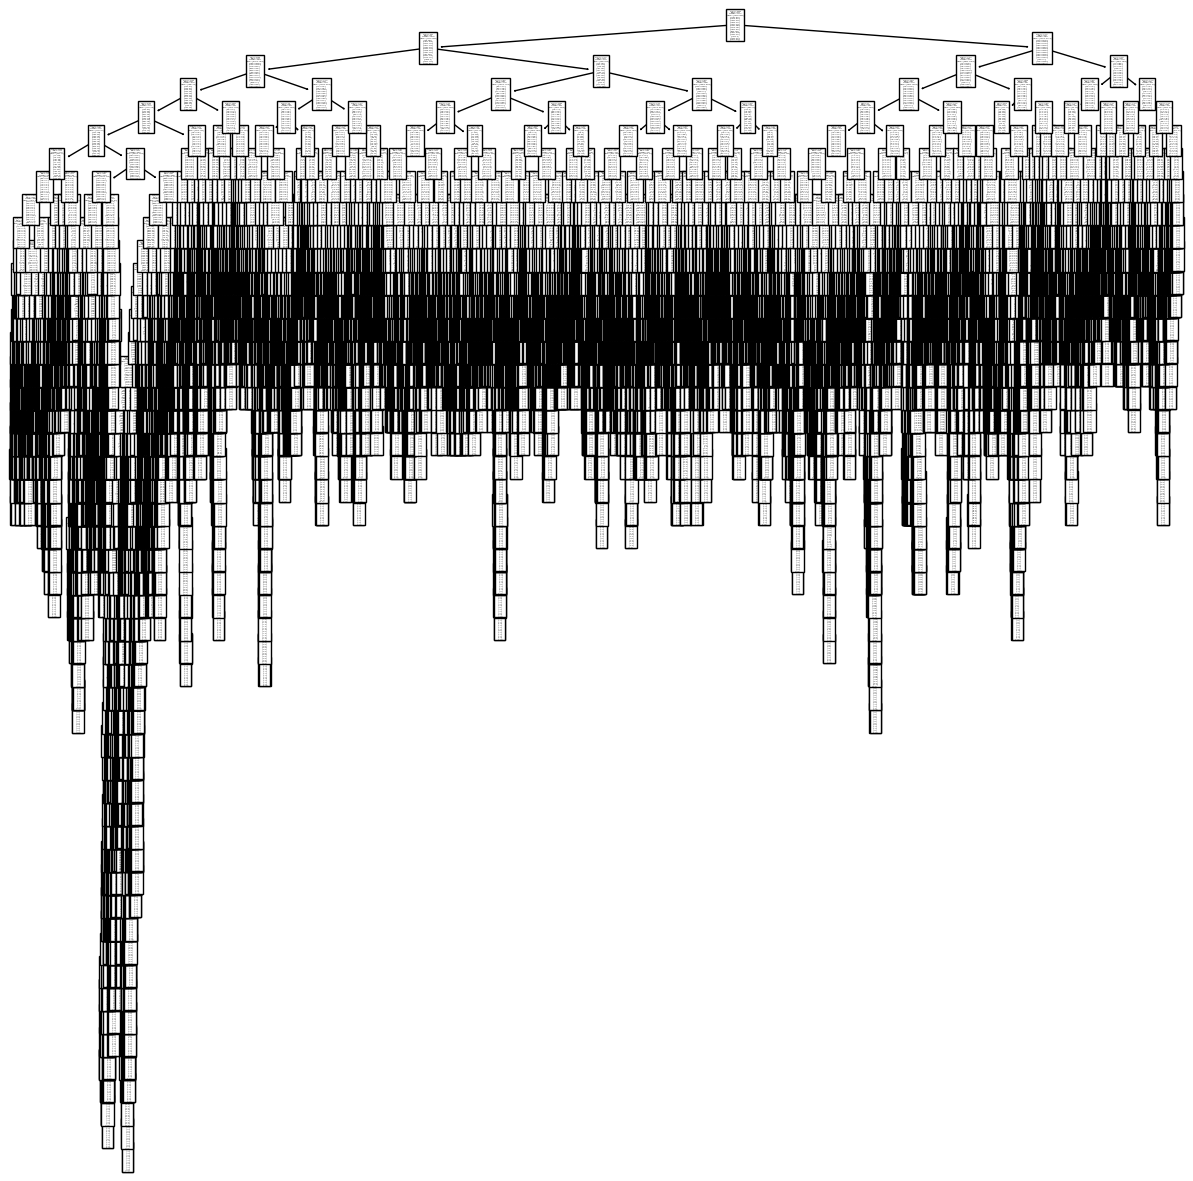

In [14]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [ ]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

In [ ]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig(os.path.join(path,'Visualization', 'DT-Train.png'))

In [ ]:
y_test_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred))
multilabel_confusion_matrix(y_test, y_test_pred)

In [ ]:
#Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_test_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig(os.path.join(path,'Visualization', 'DT-Test.png'))